# 1.  Density estimation: Psychological experiments.

#### We will use this data to study whether or not the two brain regions are likely to be independent of each other and considering different types of political view For this question; you can use the proper package for histogram and KDE; no need to write your own. The data set n90pol.csv contains information on 90 university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views. The variables amygdala and acc indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar body-type variables. The variable orientation gives the students’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal). Note that in the dataset, we only have observations for orientation from 2 to 5.




## 1a Form the 1-dimensional histogram and KDE to estimate the distributions of amygdala and acc, respectively. For this question, you can ignore the variable orientation.

In [1]:
import numpy as np
import pandas as pd
#import math
#import scipy.io as spio
#import scipy.sparse.linalg as ll
#import sklearn.preprocessing as skpp
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import os
%matplotlib inline
#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
np.seterr(divide='ignore', invalid='ignore')
#%matplotlib nbagg
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv(".\\homework3\\data\\n90pol.csv")
#m, d = df.shape

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   amygdala     90 non-null     float64
 1   acc          90 non-null     float64
 2   orientation  90 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB


In [46]:
df.head(3)

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3


In [47]:
def myHistPlot(bins,col):
    sns.histplot(df[col], bins = bins)

In [48]:
bins_slide = widgets.IntSlider(value = 1, min=1, max = 100, step = 1)
#display(bins_slide)
widgets.interact(myHistPlot, bins = bins_slide, col = 'amygdala')

interactive(children=(IntSlider(value=1, description='bins', min=1), Text(value='amygdala', description='col')…

<function __main__.myHistPlot(bins, col)>

In [50]:
def myKDEPlot(bw,col):
    sns.kdeplot(df[col], shade = True, bw_adjust = bw)

In [52]:
bw_slide = widgets.FloatSlider(value = 0.01, min=0.01, max = 3, step = 0.1)
widgets.interact(myKDEPlot, bw = bw_slide, col = 'amygdala')

interactive(children=(FloatSlider(value=0.01, description='bw', max=3.0, min=0.01), Text(value='amygdala', des…

<function __main__.myKDEPlot(bw, col)>

## Using a Jupyter Notebook Widgets to see changes in plot, below are some snapshots of plots for acc and amygdala

acc_hist_bin1.png: 


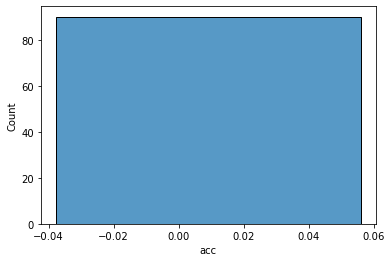

acc_hist_bin10.png: 


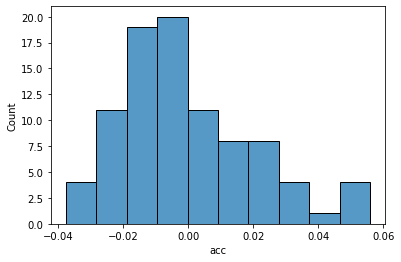

acc_hist_bin20.png: 


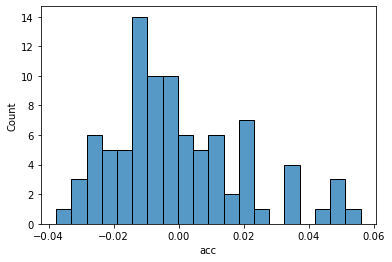

acc_hist_bin40.png: 


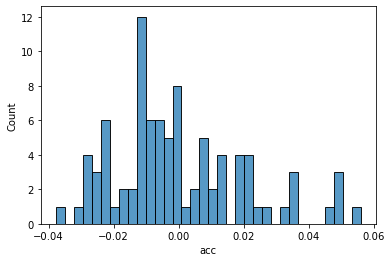

acc_hist_bin5.png: 


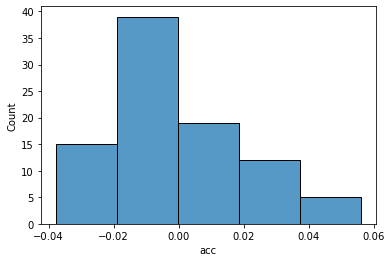

acc_hist_bin80.png: 


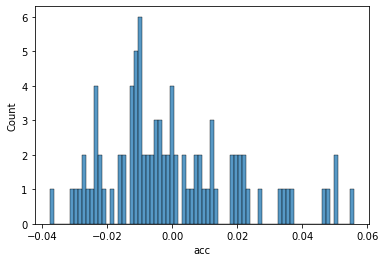

acc_kde_bw001.png: 


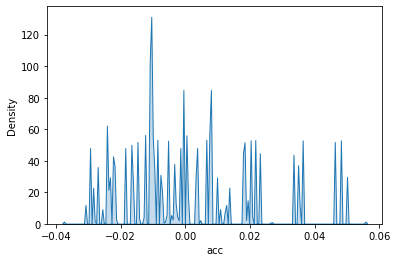

acc_kde_bw011.png: 


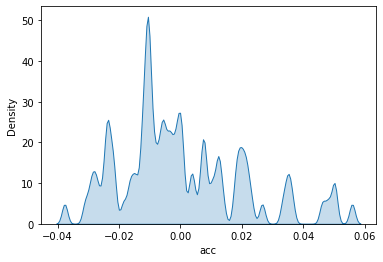

acc_kde_bw021.png: 


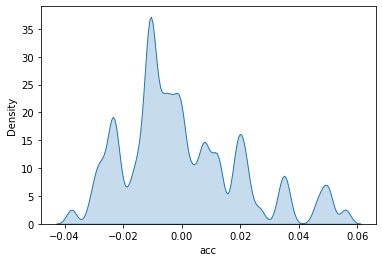

acc_kde_bw061.png: 


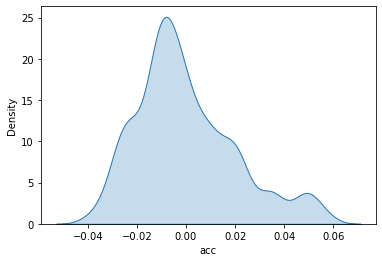

acc_kde_bw201.png: 


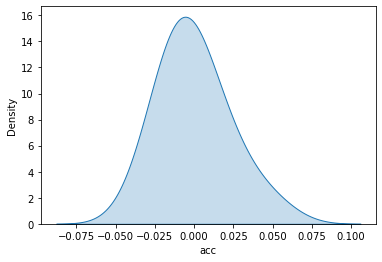

amygdala_hist_bin1.png: 


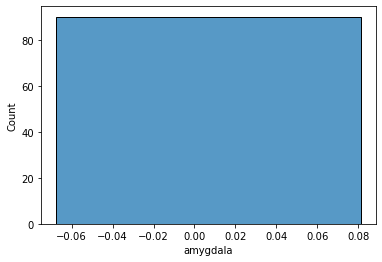

amygdala_hist_bin10.png: 


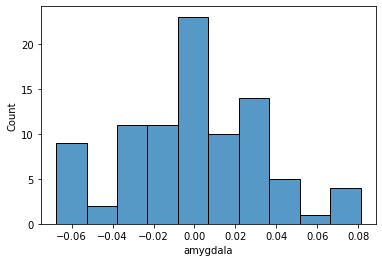

amygdala_hist_bin20.png: 


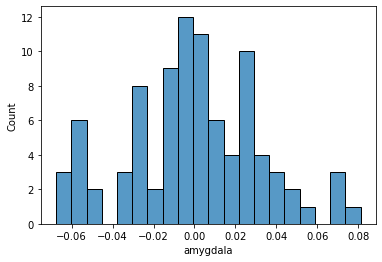

amygdala_hist_bin40.png: 


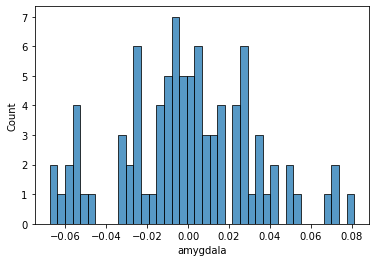

amygdala_hist_bin5.png: 


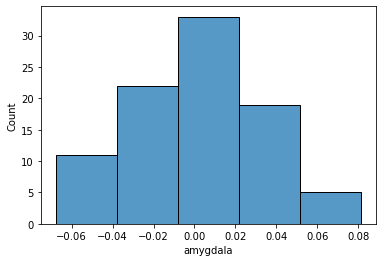

amygdala_hist_bin80.png: 


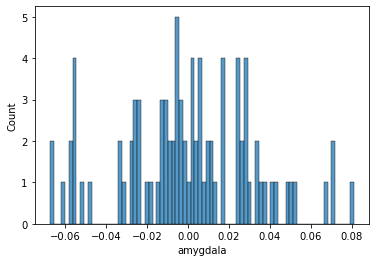

amygdala_kde_bw001.png: 


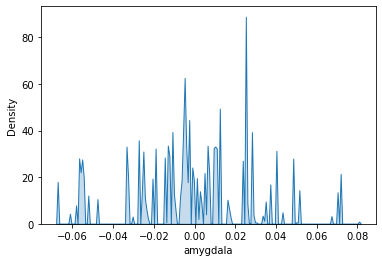

amygdala_kde_bw011.png: 


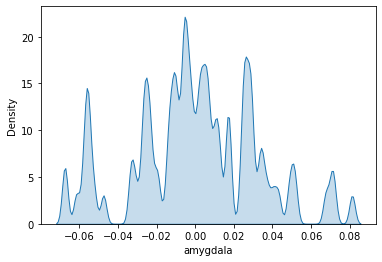

amygdala_kde_bw021.png: 


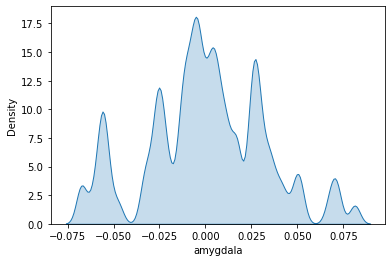

amygdala_kde_bw061.png: 


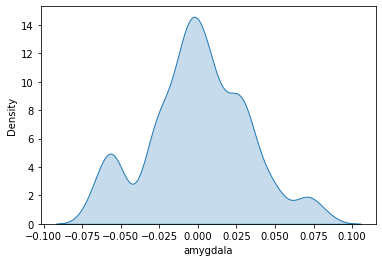

amygdala_kde_bw201.png: 


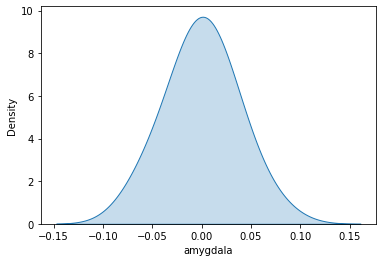

In [61]:
for image in os.listdir('.\\media\\'):
    print(image + ": ")
    display(Image(filename = '.\\media\\' + image))

_____________


## 1b Form 2-dimensional histogram for the pairs of variables (amygdala, acc). Decide on a suitable number of bins so you can see the shape of the distribution clearly. Also use kernel-density-estimation (KDE) to estimate the 2-dimensional density function of (amygdala, acc). Use a simple multi-dimensional Gaussian kernel, for
## $x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} \in \!R^{2}$

## where $x_1$ and $x_2$ are the two dimensions respectively

## $K(x) = \frac{1}{2\pi}e^{-((x_1)^2+(x_2)^2/2)}$

## Recall in this case, the kernal density estimator (KDE) for a density is given by

## $p(x) = \frac{1}{m}\sum_{i=1}^{m}\frac{1}{h}K((x^i-x)/h)$

## where $x^i$ are two-dimensional vectors, $h > 0$ is the kernel bandwidth. Set an appropriate $h$ so you can see the shape of the distribution clearly. Plot the contour plot (like the ones in slides) for your estimated density. For this question, you can ignore the variable orientation.

In [65]:
from scipy.stats import gaussian_kde

In [86]:
def my2dKDEPlot(bw):
    sns.kdeplot(data=df, x="amygdala", y="acc", fill=True, bw = bw)

In [89]:
bw_slide = widgets.FloatSlider(value = 0.01, min=0.01, max = 3, step = 0.1)
widgets.interact(my2dKDEPlot, bw = bw_slide)

interactive(children=(FloatSlider(value=0.01, description='bw', max=3.0, min=0.01), Output()), _dom_classes=('…

<function __main__.my2dKDEPlot(bw)>

2d_kde_w001.png: 


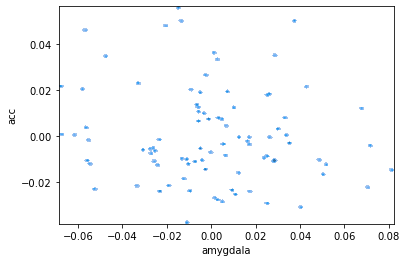

2d_kde_w011.png: 


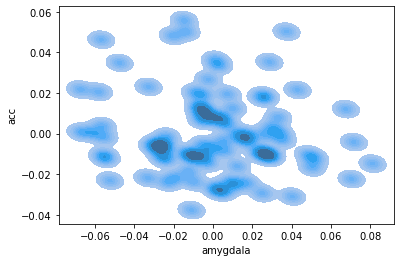

2d_kde_w021.png: 


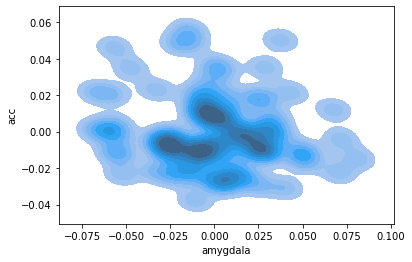

2d_kde_w031.png: 


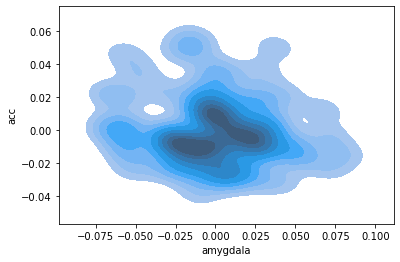

2d_kde_w051.png: 


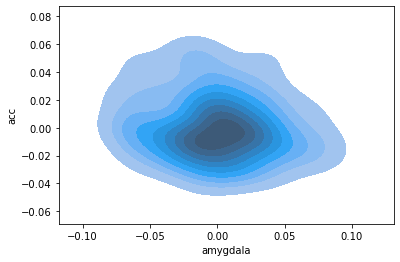

2d_kde_w081.png: 


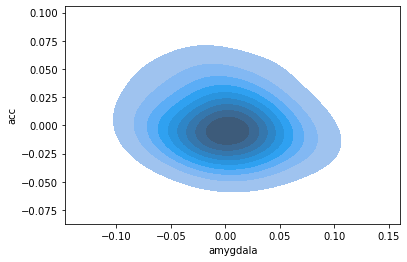

In [90]:
for image in os.listdir('.\\media\\1b\\'):
    print(image + ": ")
    display(Image(filename = '.\\media\\1b\\' + image))

## When h (bandwidth) is around 0.21~0.31 I see the shape of the bivariate distribution clearly and where the points are clustered around

_______________

## 1c Using (a) and (b), using KDE estimators, verify whether or not the variables amygdala and acc are independent? You can tell this by checking do we approximately have p(amygdala, acc) = p(amygdala)p(acc)? To verify this, please show three plots: the map for p(amygdala, acc), the map for p(amygdala)p(acc) and the error map |p(amygdala, acc)−p(amygdala)p(acc)|. Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related.


In [160]:
from sklearn.neighbors import KernelDensity
import scipy.stats as st

### 1-dimensional KDE ###

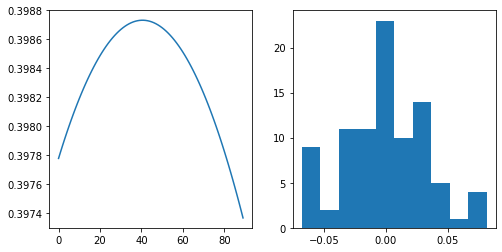

In [193]:
def marginal_kde(X, bins):
    deltaX = (max(X) - min(X))/bins
    xmin = min(X) - deltaX
    xmax = max(X) + deltaX
    X = X.reshape(-1, 1)
    X_plot = np.linspace(xmin, xmax, bins)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)
    log_dens = kde.score_samples(X_plot)
    return np.exp(log_dens)

test_data = my_array[:,0]
Z = marginal_kde(test_data, len(test_data))
fig,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].plot(Z)
ax[1].hist(test_data)
plt.show()


### Joint KDE ###

min=0.133781376919331, max=213.019662711216


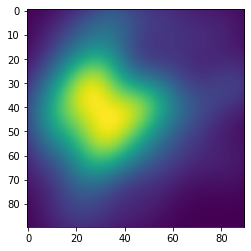

In [197]:
def joint_kde(data, bins):
    x = data[:, 0]
    y = data[:, 1]
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    # Create meshgrid
    delta = np.complex(0,bins)
    X, Y = np.mgrid[xmin:xmax:delta, ymin:ymax:delta]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    return Z

Z = joint_kde(my_array, len(my_array))
print("min={}, max={}".format(np.min(Z), np.max(Z)))
_ = plt.imshow(Z)


In [302]:
# x = my_array[:, 0]
# y = my_array[:, 1]
# xmin = min(x)
# xmax = max(x)
# ymin = min(y)
# ymax = max(y)

# # Create meshgrid
# delta = np.complex(0,len(my_array))
# X, Y = np.mgrid[xmin:xmax:delta, ymin:ymax:delta]
# positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([x, y])
# kernel = st.gaussian_kde(values)
# Z = np.reshape(kernel(positions).T, X.shape) #what's being plotted


### Evaluating Independence ###

In [151]:
my_array = np.asarray(df[['amygdala','acc']])
my_array.shape

(90, 2)

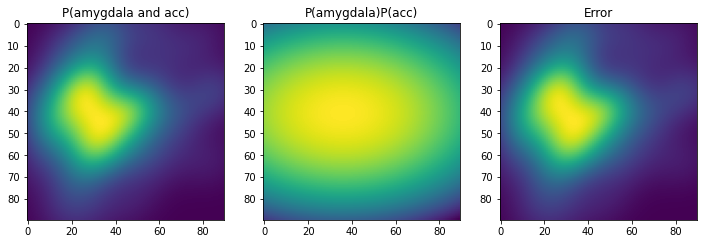

In [203]:

kde_joint_image = joint_kde(my_array, len(my_array))
kde_marg_1 = marginal_kde(my_array[:,0], len(my_array[:,0]))
kde_marg_2 = marginal_kde(my_array[:,1], len(my_array[:,1]))

kde_outer_image= np.outer(kde_marg_1, kde_marg_2)
fig, ax = plt.subplots(1,3, figsize=(12,4))
kde_diff = kde_joint_image - kde_outer_image

ax[0].set_title("P(amygdala and acc)")
ax[0].imshow(kde_joint_image)

ax[1].set_title("P(amygdala)P(acc)")
ax[1].imshow(kde_outer_image)

ax[2].set_title("Error")
ax[2].imshow(kde_diff)
plt.show()


### Answer: Based on the plots, amygdala and acc (two parts of thr brain) do not seem to be independent. Would have expected to find no pattern for the error plot, but there seems to be one ###

_____________

##  1d (5 points)  Now we will consider the variable orientation. We will estimate the conditional distribution of the volume of the amygdala, conditioning on political orientation: p(amygdala|orientation = c), c = 2, . . . , 5. Do the same for the volume of the acc: Plot p(acc|orientation = c), c = 2, . . . , 5. You will use KDE to achieve the goal. (Note that the conditional distribution can be understood as fitting a distribution for the data with the same (fixed) orientation. Thus there should be 4 one-dimensional distribution functions to show for this question.) ##

In [215]:
def myKDEPlot(bw,col, orientation):
    sns.kdeplot(df[df['orientation'] == orientation][col], shade = True, bw_adjust = bw)

bw_slide = widgets.FloatSlider(value = 0.01, min=0.01, max = 3, step = 0.1)
orientation_slide = widgets.IntSlider(2,2,5,1)
widgets.interact(myKDEPlot, bw = bw_slide, col = 'amygdala', orientation = orientation_slide)    

interactive(children=(FloatSlider(value=0.01, description='bw', max=3.0, min=0.01), Text(value='amygdala', des…

<function __main__.myKDEPlot(bw, col, orientation)>

## Conditioned P(Amygdala|Orientation) and P(Acc|Orientation) @ bw adjustment = 0.31##

acc_bw031_orientation2.png: 


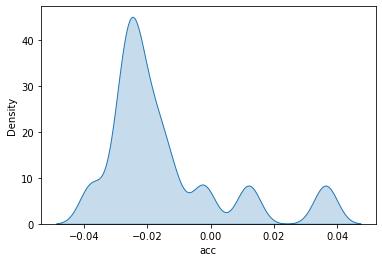

acc_bw031_orientation3.png: 


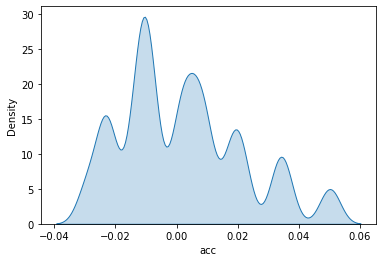

acc_bw031_orientation4.png: 


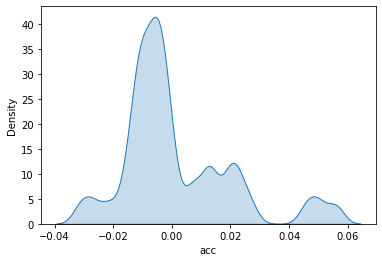

acc_bw031_orientation5.png: 


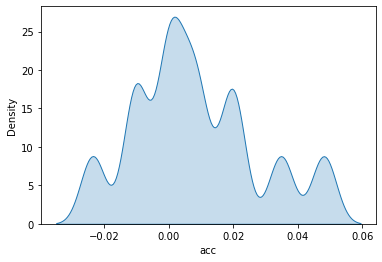

amy_bw031_orientation2.png: 


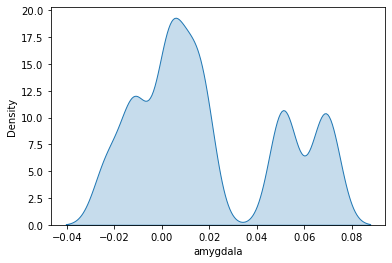

amy_bw031_orientation3.png: 


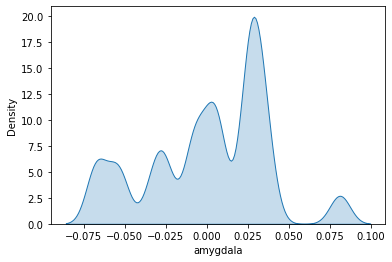

amy_bw031_orientation4.png: 


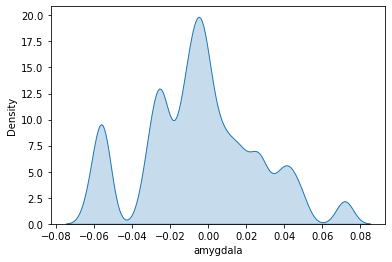

amy_bw031_orientation5.png: 


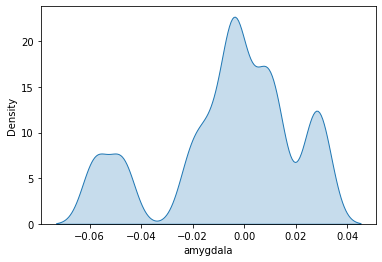

In [216]:
for image in os.listdir('.\\media\\1d\\'):
    print(image + ": ")
    display(Image(filename = '.\\media\\1d\\' + image))

____________

##  1e (5 points) Now we will consider the variable orientation. We will estimate the conditional distribution of the volume of the amygdala, conditioning on political orientation: p(amygdala|orientation = c), c = 2, . . . , 5. Do the same for the volume of the acc: Plot p(acc|orientation = c), c = 2, . . . , 5. You will use KDE to achieve the goal. (Note that the conditional distribution can be understood as fitting a distribution for the data with the same (fixed) orientation. Thus there should be 4 one-dimensional distribution functions to show for this question.) ##

In [212]:
def my2dKDEPlot(bw, orientation):
    sns.kdeplot(data=df[df['orientation'] == orientation], x="amygdala", y="acc", fill=True, bw = bw)

In [213]:
bw_slide = widgets.FloatSlider(value = 0.01, min=0.01, max = 3, step = 0.1)
orientation_slide = widgets.IntSlider(2,2,5,1)
widgets.interact(my2dKDEPlot, bw = bw_slide, orientation = orientation_slide)

interactive(children=(FloatSlider(value=0.01, description='bw', max=3.0, min=0.01), IntSlider(value=2, descrip…

<function __main__.my2dKDEPlot(bw, orientation)>

## Conditioned P(Amygdala, ACC|Orientation) @ bw adjustment = 0.31 ##

joint_bw031_orientation2.png: 


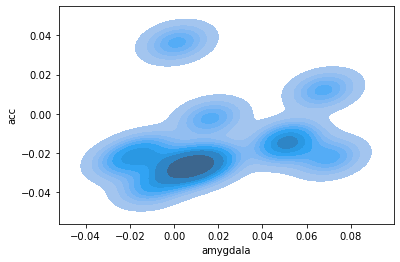

joint_bw031_orientation3.png: 


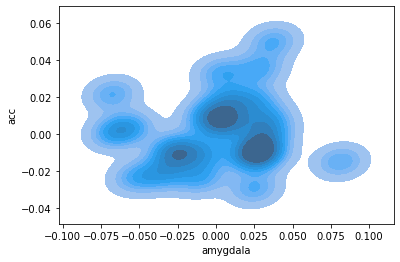

joint_bw031_orientation4.png: 


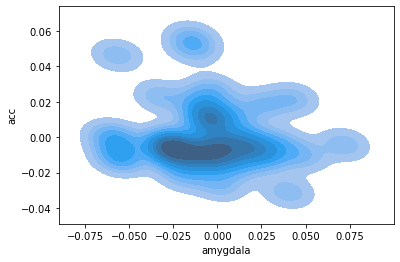

joint_bw031_orientation5.png: 


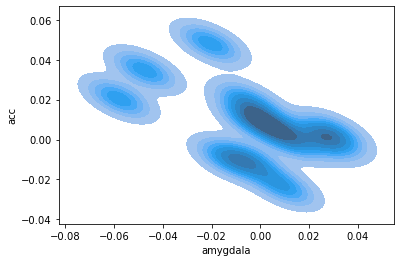

In [217]:
for image in os.listdir('.\\media\\1e\\'):
    print(image + ": ")
    display(Image(filename = '.\\media\\1e\\' + image))

___________

##  1f (5 points) Using (d) and (e), evaluate whether or not the two variables are likely to be conditionally independent. To verify this, please show three plots: the map for p(amygdala, acc|orientation = c), the map for p(amygdala|orientation = c)p(acc|orientation = c) and the error map |p(amygdala, acc|orientation = c) − p(amygdala|orientation = c)p(acc|orientation = c)|, c = 2, . . . , 5. Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related, conditionally on the political orientation (i.e., considering different types of personality). ##

In [282]:
def marginal_kde(X, bins):
    deltaX = (max(X) - min(X))/bins
    xmin = min(X) - deltaX
    xmax = max(X) + deltaX
    X = X.reshape(-1, 1)
    X_plot = np.linspace(xmin, xmax, bins)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
    log_dens = kde.score_samples(X_plot)
    return np.exp(log_dens)

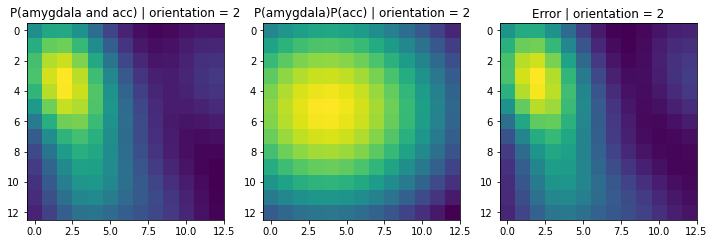

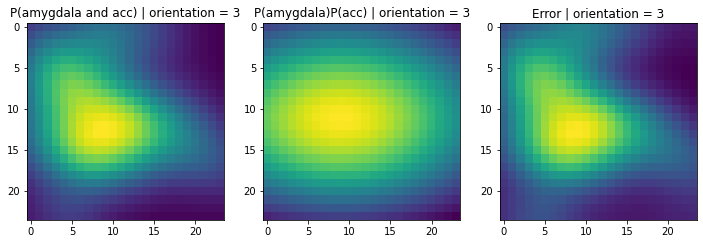

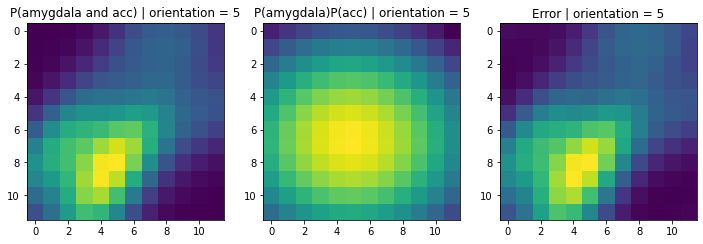

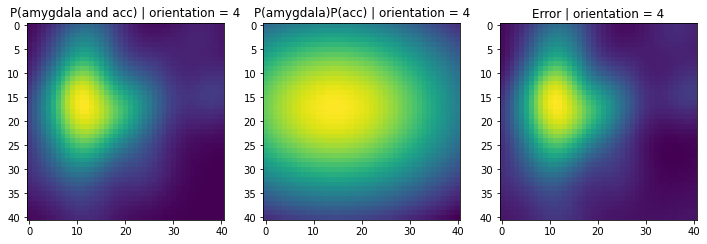

In [283]:
for orientation in df['orientation'].unique():
    my_arrary = np.asarray(df[df['orientation'] == orientation][['amygdala','acc']])
    kde_joint_image = joint_kde(my_arrary, len(my_arrary))
    kde_marg_1 = marginal_kde(my_arrary[:,0], len(my_arrary[:,0]))
    kde_marg_2 = marginal_kde(my_arrary[:,1], len(my_arrary[:,1]))

    kde_outer_image= np.outer(kde_marg_1, kde_marg_2)
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    kde_diff = kde_joint_image - kde_outer_image

    ax[0].set_title("P(amygdala and acc)" + " | orientation = " + str(orientation))
    ax[0].imshow(kde_joint_image)

    ax[1].set_title("P(amygdala)P(acc)" + " | orientation = " + str(orientation))
    ax[1].imshow(kde_outer_image)

    ax[2].set_title("Error" + " | orientation = " + str(orientation))
    ax[2].imshow(kde_diff)
    plt.show()


## Answer: Regardless of political orientation, error maps have some sort of patterns, as opposed to having no pattern. This indicates that across political orientation, amygdala and acc are dependent with one another ##

_______________


# 2.  Implementing EM for MNIST dataset, with PCA for dimensionality reduction. (55 points)


#### Implement the EM algorithm for fitting a Gaussian mixture model for the MNIST dataset. We reduce the dataset to be only two cases, of digits “2” and “6” only. Thus, you will fit GMM with C = 2. Use the data file data.mat or data.dat. True label of the data are also provided in label.mat and label.dat The matrix images is of size 784-by-1990, i.e., there are totally 1990 images, and each column of the matrix corresponds to one image of size 28-by-28 pixels (the image is vectorized; the original image can be recovered by map the vector into a matrix). First use PCA to reduce the dimensionality of the data before applying to EM. We will put all “6” and “2” digits together, to project the original data into 5-dimensional vectors. Now implement EM algorithm for the projected data (with 5-dimensions). ####




In [2]:
from scipy import io
from scipy.stats import multivariate_normal as mvn
from sklearn import preprocessing

In [3]:
images = io.loadmat('.\\homework3\\data\\data.mat')['data']
labels = io.loadmat('.\\homework3\\data\\label.mat')['trueLabel']

In [4]:
print(images.shape)
print(labels.shape)

(784, 1990)
(1, 1990)


__________

## 1a (5 points) Select from data one raw image of “2” and “6” and visualize them, respectively. ##

An example of 2 before processing:


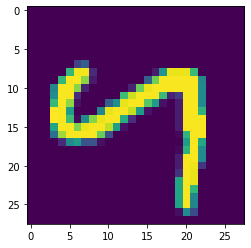

In [358]:
print('An example of 2 before processing:')
plt.imshow(images.T[0].reshape(28,28))

An example of 6 before processing:


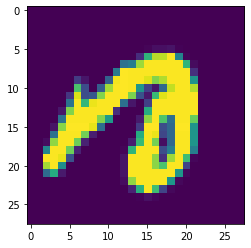

In [359]:
print('An example of 6 before processing:')
plt.imshow(images.T[-1].reshape(28,28))

____________

## 1b (10 points) Write down detailed expression of the E-step and M-step in the EM algorithm (hint: when computing $\tau_k^i$, you can drop the $(2\pi)^{n/2}$ factor from the numerator and denominator expression, since it will be canceled out; this can help avoid some numerical issues in computation). ##

### Answer: EM Algorithm associates the ith data and each component with a $\tau_k^i$. Next step is to initialize $(\pi_k, \mu_k, \Sigma_k), k = 1 ... K$  mixing coefficients, means vector, and covariance matrix respectively. And then iterate 1) Expectation step, and 2) Maximization step ###

### In the Expectation step, we evaluate $\tau_k^i$ using the current parameter values ###
### $\tau_k^i = p(z_k^i = 1 | D, \mu, \Sigma) = \frac{\pi_kN(x^i|\mu_k,\Sigma_k)}{\Sigma_{k'=1}^K\pi_{k'}N(x^i|\mu_{k'},\Sigma_{k'})}$ $(k=1...K,i=1...m)$ ###
### If $x \in R^n$, for multivariate normal distribution, $N(x|\mu,\Sigma)$ =  ###
### $\frac{1}{(2\pi)^n|\Sigma|}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)$. Plugging this in, we get ###

### $\frac{\pi_kN\frac{1}{(2\pi)^n|\Sigma|}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}{\Sigma_{k'=1}^K\pi_{k'}N\frac{1}{(2\pi)^n|\Sigma|}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$ = $\frac{\pi_k}{\Sigma_{k'=1}^K\pi_{k'}}$ ###

### Next update $(\pi_k,\mu_k,\Sigma_k)$ guven $\tau_k^i$ ###
### $\pi_k = \Sigma_i\tau_k^i/m$, $\mu_k = \Sigma_i\tau_k^ix^i/\Sigma_i\tau_k^i$ ### 
### $\Sigma_k = \Sigma\tau_k^i(x^i-\mu_k)(x^i-\mu_k)^T/\Sigma_i\tau_k^i$ ###
### $(k=1...K, i = 1, ..., m)$ ###

____________________________

## 1c: (15 points) Implement EM algorithm yourself. Use the following initialization ##

In [8]:
m, n = images.shape
C = np.matmul(images.T, images)/m
V,_,_ = np.linalg.svd(C)
V = V[:, :5]
pcadata = np.dot(images,V)

In [9]:
mean = np.mean(images.T, axis=1)
new_matrix = images - mean
C = np.dot(new_matrix,new_matrix.T)/m
V,W,_ = np.linalg.svd(C)
V = V.real
V = V[:, :5]
pdata = np.dot(V.T,new_matrix)